# **Setting up GPU**

*   Go to **Edit** -> **Notebook Settings** -> **Hardware Accelerator**
*   Select GPU



# **Keras**


*   A deep learning framework that offers simple **APIs to implement and train common neural network architectures**.
*   Integrated with low-level deep learning library, tensorflow.
*   Provides flexibility to define models using both keras and tensorflow simultaneously.
*   Read more: https://keras.io/why-use-keras/


# **Training a Neural Network Classifier** 


1.   Load and Process Data
2.   Define Model
3.   Compile and Train
4.   Evaluate


# **Load Dataset**

*   We will work with **MNIST, Fashion-MNIST and IMDB**  datasets
*   Keras includes some common datasets (all three are there)

**MNIST** 
*   Database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples
*   Each digit is represented 28 x 28 pixel values
*   Digit has to be classified as one of the 0-9 (Total 10 classes)




11501568/11490434 [==============================] - 0s 0us/step
Train Image Shape:  (60000, 28, 28) Train Label Shape:  (60000,)
<class 'numpy.ndarray'>
Test Image Shape:  (10000, 28, 28) Test Label Shape:  (10000,)
[5 0 4 ... 5 6 8]
Visualizing a random image (11th) from training dataset


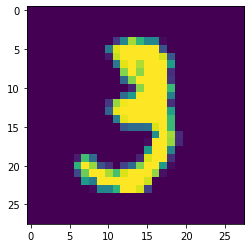

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical


 #Load MNISt dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Check number of samples (60000 in training and 10000 in test)
# Each image has 28 x 28 pixels
print("Train Image Shape: ", train_images.shape, "Train Label Shape: ", train_labels.shape) 
print(type(train_images))
print("Test Image Shape: ", test_images.shape, "Test Label Shape: ", test_labels.shape) 

print(train_labels)
#  Visualizing a random image (11th) from training dataset
print("Visualizing a random image (11th) from training dataset")
_ = plt.imshow(train_images[10])


In [ ]:
# Preprocessing: Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5


# **Define Neural Network Model**

To define simple models, we will use

*   **Sequential Model** which is  simply linear stack of layers 
*   **Layers** include Linear layer (**Dense**), Convolutional Layers (**Conv1D, Conv2D etc.**), recurrent layers (**RNN, LSTM**), dropout etc.


In more complicated scenarios (e.g. Multi-output model, models with shared parameters etc.), we will use **Functional APIs**.
*    This will be used in later part of tutorial, where we implement a multi-task learning system.




---




# **Feed-Forward Neural Network**

*   For a simple feed-forward neural network, only use stack of **Dense** and **Dropout** Layers

*   **Dense** implements the operation: $output=activation(W^Tx + b)$

*   **Dropout** is the most commonly (**almost 100%**) used mechanism to avoid overfitting in a neural network. It randomly set a fraction (rate) of input units to **zero** during training. 

*    Regularization techniques such as $l_1$ and $l_2$ norms are too expensive when training a big neural network with millions of parameters (**extremely SLOW**).

*    Use **Dropout without an exception**. You will see that the first model we define next has over 900K parameters that will be trained using just 60,000 samples. When using such **overparametrization**, model can easily remember labels for each training sample but fail to generalize to test samples.
*    It is a good practice to validate your model's architecture by using $model.summary()$ 


In [ ]:
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


#  Define a Feed-Forward Model with 2 hidden layers with dimensions 392 and 196 Neurons
model = Sequential([
  Dense(784, activation='relu', input_shape=(28*28,), name="first_hidden_layer"),
  Dense(784//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(10, activation='softmax'),
])

#  Validate your Model Architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden_layer (Dense)   (None, 784)               615440    
_________________________________________________________________
second_hidden_layer (Dense)  (None, 392)               307720    
_________________________________________________________________
dropout (Dropout)            (None, 392)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3930      
Total params: 927,090
Trainable params: 927,090
Non-trainable params: 0
_________________________________________________________________
None


# **Training our Neural Network**

*   Before training our model, we need to configure the learning process by using $compile()$ method

> We specify **three** training parameters:

1.   **Optimizer**: e.g. $sgd$ (stochastic gradient descent) or some advance optimizers such as $adam$ (**very stable training**). For a simple model, while the difference in model's performance is not significant, when using very deep neural netoworks like RNNs/ LSTMs it becomes difficult to successfully train them with SGD.
2.   **Loss**: Objective that we want to optimize e.g. RSS, Cross-Entropy etc.
3.   **Metrics**: List of metrics you want to use to evaluate your model e.g. Accuracy, F1 score etc.


*   For training our models, we typically use $fit()$ method, pass training data and labels, specify other hyper-parameters such as $batch\_size, epochs$.



In [ ]:
# Compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_train_images = train_images.reshape((-1, 28*28))
flatten_test_images = test_images.reshape((-1, 28*28))
print("Train image shape: ", train_images.shape, "Flattened image shape: ", flatten_train_images.shape)
print(train_labels.shape)


print(type(flatten_train_images[0,0]))
print(type(train_labels[0]))

# Train model
model.fit(flatten_train_images, to_categorical(train_labels), epochs=10, batch_size=256,)

Train image shape:  (60000, 28, 28) Flattened image shape:  (60000, 784)
(60000,)
<class 'numpy.float64'>
<class 'numpy.uint8'>
Epoch 1/10
235/235 [==============================] - 4s 5ms/step - loss: 1.3522 - accuracy: 0.6551
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6473 - accuracy: 0.8317
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4949 - accuracy: 0.8625
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4322 - accuracy: 0.8763
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3950 - accuracy: 0.8870
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3701 - accuracy: 0.8918
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3506 - accuracy: 0.8977
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3353 - accuracy: 0.9018
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss



---



# **Evaluation**

*   Evaluate the model on test images using $model.evaluate()$, pass test images and labels as arguments. 



In [ ]:
# Evaluate your model's performance on the test data
performance = model.evaluate(flatten_test_images, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2721 - accuracy: 0.9235
Accuracy on Test samples: 0.9235000014305115



---


# **Convolutional Neural Network**

*   For large input (like image of size 1024*1024), fully connected NN requires a lot of parameters
*   Input can also have local structures
*   Use convolutional operation
*   Define a convolutional layer using $Conv2D$ that creates a 2d convloutional layers, specify arguments such as the size of filters (32), kernel (3), activation (relu) etc.

**Note**: In this part of code, we separate the feature layers from classifier layer to accomodate the later part of tutorial on **Fine-tuning**. An equivalent implementation for
```
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)
```

**is ==>**

```
cnn_model = Sequential([Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), 
            Flatten(),Dense(512, activation='relu'), Dense(10, activation='softmax'),])
```

> **Compile, train, test the model and compare**


1.   Number of Parameters (almost half the size of fully connected NN)
2.   Performance (significantly better than fully connected NN, due to the capability of CNN to model local receptive field)



In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(60000,28,28,1)
test_images_3d = test_images.reshape(10000,28,28,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(test_labels))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)             

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D


# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features_1 = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(10, activation='softmax'),]

cnn_model_1 = Sequential(common_features_1+classifier)

print(cnn_model_1.summary())  # Compare number of parameteres against FFN
cnn_model_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(60000,28,28,1)
test_images_3d = test_images.reshape(10000,28,28,1)

cnn_model_1.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256,)
performance = cnn_model_1.evaluate(test_images_3d, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

# Training Time


*   Previous results suggest using deeper models will increase the training time.
*   In general, assuming that we've got enough power for parallel computation, traning deeper networks takes longer compared to wider networks. This is possible thanks to the possibility of doing each layer's calcualtions in parallel. In other words, in a deep model, we cannot do the computaion of different layers simultaneously. 





# Effective receptive field of convolutinal filters


*   Stacking two 3\*3 conv layers = A single 5\*5 filter 
*   Stacking three 3\*3 conv layers = A single 7\*7 filter

Note the change in the number of parameters:

*   2 * (3\*3) = 6 vs. 5\*5 = 25
*   3 * (3\*3) = 27 vs. 7\*7 = 49











# Transfer Learning (CNN Layers) and fine-tuning

*   The Feature Layers (convolutional layers) learn some low-level patterns that can be effectively used for many (most) other tasks
*   These low level features are transferable
*   We use the **feature layers** from the pretrained model on MNIST dataset and disable parameter update for them
*   **Fine-tune classification layers** in the model on a new **Fashion MNIST** dataset

**Fashion MNIST** 
*   Database of fashion categories, has a training set of 60,000 examples, and a test set of 10,000 examples
*   Each image is represented 28 x 28 pixel values
*   Digit has to be classified as one of the 10 types

**Categories:** 

0.   T-shirt/top
1.   Trouser
2.   Pullover
3.   Dress
4.   Coat
5.   Sandal
6.   Shirt
7.   Sneaker
8.   Bag
9.   Ankle Boot

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
Visualize a sample


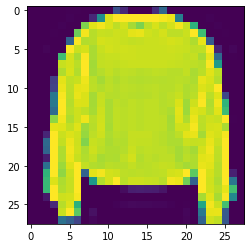

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

(train_fashion_images, train_fashion_labels), (test_fashion_images, test_fashion_labels) = fashion_mnist.load_data()
print(train_fashion_images.shape)

train_fashion_images = (train_fashion_images / 255) - 0.5
test_fashion_images = (test_fashion_images / 255) - 0.5
print("Visualize a sample")
_ = plt.imshow(train_fashion_images[7])




---


*   **Freeze the Feature Layers** by disabling "trainable" attribute

```
for l in common_features:
  l.trainable = False
```

*    Check number of trainable parameters in model's summary
*    Feature Layers (Convolutional) are non-trainable

```
Total params: 659,914
Trainable params: 594,922
Non-trainable params: 64,992
```


In [ ]:
train_fashion_images_3d = train_fashion_images.reshape(60000,28,28,1)
test_fashion_images_3d = test_fashion_images.reshape(10000,28,28,1)


for l in common_features:
  l.trainable = False

print(cnn_model.summary())

cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

cnn_model.fit(train_fashion_images_3d, to_categorical(train_fashion_labels), epochs=1, batch_size=256,)
performance = cnn_model.evaluate(test_fashion_images_3d, to_categorical(test_fashion_labels))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)             



---


**Compare Transferred Model against the Model trained from scratch**

*   The performance is roughly 15-30% lower (depends on network initialization)



In [ ]:
features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(10, activation='softmax'),]

new_model = Sequential(features+classifier)
print(new_model.summary())

new_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

new_model.fit(train_fashion_images_3d, to_categorical(train_fashion_labels), epochs=1, batch_size=256,)
performance = new_model.evaluate(test_fashion_images_3d, to_categorical(test_fashion_labels))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

# Multi-Task Learning


*   We observed feature layers are transferable across classification tasks (Transfer Learning)
*   Learned Fetaure layers can **generalize better** if we learn them **over multiple tasks and datasets** (Multi-task Learning)
*   In this part of tutorial, we will use **functions APIs** that provide greater flexibility to define complex models (e.g. two models on two different tasks with shared parameters)
*    Key Idea:
> Successively call Layers over the Input to get the Output
```
y = Layer_Ouput(Layer_Hidden(Layer_Input(x)))
```
> Use input and output to define Model 
```
model = Model(inputs=train_X, outputs=train_y)
```

*    We can **reuse** these trained layers in any new model by calling them on new input tensors
*    Training this model for 2 epochs gives superior performance against the individual models trained for 5-10 epochs
*    Model can quickly learn better generalizable features, if the objective tasks are related 

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Define a fetaure extraction model that is shared for both mnist and fashion-mnist tasks
Base_feature_model = Sequential([Conv2D(32, kernel_size=3, activation='relu'), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Flatten(), Dense(512, activation='relu'),])

Classifier_mnist = Sequential([Dense(10, activation='softmax')])
Classifier_fashion_mnist = Sequential([Dense(10, activation='softmax')])

# Instantiate a Tensor to feed Input (Input Layer)
mnist_input = Input(shape=(28,28,1))
fashion_mnist_input = Input(shape=(28,28,1))

# Call Base_feature_model over the mnist images
mnist_features = Base_feature_model(mnist_input)

# Call Base_feature_model over the fashion-mnist images
fashion_mnist_features = Base_feature_model(fashion_mnist_input)

# Call mnist_prediction layer over the mnist images
# mnist_prediction represents the predicted output for mnist dataset
mnist_prediction = Classifier_mnist(mnist_features)

# Call fashion_mnist_prediction layer over the mnist images
# fashion_mnist_prediction represents the predicted output for fashion-mnist dataset
fashion_mnist_prediction = Classifier_fashion_mnist(fashion_mnist_features)

# define model by calling Model(inputs, outputs) on the instance of input layers and output layers
joint_model = Model(inputs=[mnist_input, fashion_mnist_input], 
                    outputs=[mnist_prediction, fashion_mnist_prediction])

print(joint_model.summary())

joint_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'],)  # Using adam optimizer for faster convergence

joint_model.fit([train_images_3d, train_fashion_images_3d], 
                [to_categorical(train_labels), to_categorical(train_fashion_labels)], 
                epochs=1, batch_size=1024,)
performance = joint_model.evaluate([test_images_3d, test_fashion_images_3d], 
                                   [to_categorical(test_labels), 
                                    to_categorical(test_fashion_labels)], verbose=1)

print("===\nMNIST Accuracy: {0}\nFashion MNIST Accuracy: {1}".format(performance[3], performance[4]))


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 512)          589792      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 10)           5130        sequential_4[0][0]           

# **Sequence Classification using Recurrent Neural Networks (LSTM)**

*   In previous experiments, we observed CNN models are more suitable for image classification tasks (compared against feed-forward neural networks)
*   Choosing appropriate **Model Prior** is crucial to training a neural network model (Each model has innate capacity to capture certain aspects in the input data)
*   For modeling **sequential data** (e.g. time-series data, natural languages), recurrent neural network (a powerful version LSTM) provides a very strong prior
*   In this part, we will use IMDB corpus (movie reviews) to perform sentiment analysis

**IMDB** 
*   Database of 25,000 movie reviews each for training and test, labeled with positive/negative sentiments
*   Review is pre-processed and words are encoded with word-indices in a dictionary 


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# select 5000 most frequent words, other infrequent words are replaced with <UNKNOWN> symbol
max_num_words = 5000

max_sequence_length = 128
(train_imdb_texts, train_imdb_labels), (test_imdb_texts, test_imdb_labels) = imdb.load_data(num_words=max_num_words)

# Since each review can have different number of words, we fix the input length to "max_sequence_length=128".
# Reviews with < 128 words will be padded with some symbol <PAD> and > 128 words will be truncated 
train_imdb_texts = sequence.pad_sequences(train_imdb_texts, maxlen=max_sequence_length)
test_imdb_texts = sequence.pad_sequences(test_imdb_texts, maxlen=max_sequence_length)

#  Print an example dataset (represented with word indices)
print(train_imdb_texts[0])

#  Print actual review by mapping word indices to the corresponding word in the dictionary 
index = imdb.get_word_index()
index_to_word = dict([value, key] for (key, value) in index.items())

# Print Decoded Sequence
print("Text: ", ' '.join([index_to_word.get(i-3, "<UNKNOWN>") for i in train_imdb_texts[0]]))
print("Label: ", train_imdb_labels[0])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# tensorflow 2.0+ will defaul use eager mode and will cause error for the code below
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Embedding layers transform word indices to continuous word vectors
# Apply LSTM on the sequence of word vectors
sentiment_classification_model = Sequential([Embedding(max_sequence_length, 256), 
                                             LSTM(256, dropout=0.2, recurrent_dropout=0.2), 
                                             Dense(1, activation='sigmoid')])

print(sentiment_classification_model.summary())

sentiment_classification_model.compile(optimizer='adam', loss='binary_crossentropy',
                                       metrics=['accuracy'],)  # Using adam optimizer for faster convergence

print(train_imdb_texts[0])
print(train_imdb_labels.shape)
sentiment_classification_model.fit(train_imdb_texts, train_imdb_labels, epochs=5, batch_size=1024)
performance = sentiment_classification_model.evaluate(test_imdb_texts, test_imdb_labels)

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         32768     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 558,337
Trainable params: 558,337
Non-trainable params: 0
_________________________________________________________________
None
[  12    8  316    8  106    5    4 2223    2   16  480   66 3785   33
    4  130   12   16   38  619    5   25  124   51   36  135   48   25
 1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117    2   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  3

In [ ]:
from tensorflow.keras import backend as K

# embedding layers: shows the relation of data into a higher dimension
print(len(train_imdb_texts[0]))
get_1st_layer_output = K.function([sentiment_classification_model.layers[0].input],
                                  [sentiment_classification_model.layers[0].output])
layer_output = get_1st_layer_output([train_imdb_texts[0]])[0]
print(layer_output)
print(len(layer_output))
print(len(layer_output[0]))



---


**Can you try building a Feed-forward neural network for sentiment analysis and compare number of parameters and performance against LSTM-based model?**

# **Hyperparameter Tuning**

*    We find Parameters of a Neural Network using some optimzation technique 
*    Hyperparmeters are obtained through search
*    Generally, we use **grid search** to find optimal hyperparameters (**Brute-Force Approach**)
*    **TPE** (Tree Stuctured Parzen Estimator) is another popular approach (based on Gaussian Processes) to estimate hyperparameters
*    Here, we use **Hyperopt** library that provides an easy to use TPE based hyperparameter optimization algorithm 



In [ ]:
!pip install hyperopt

# Steps to use hyperopt

*   Define hyperparameter search space
```
space = {'conv_kernel_size': hp.choice('conv_kernel_size', [3, 5]), 
'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}
```
Here we search among 2 values (3,5) for kernel size of convolutional layers, 2 possible values (SGD, Adam) for optimizers, and the dropout rate of a float number between 0.1 and 0.35 sampled uniformly.

*   Define the **objective function** to optimize
1.    It takes hyperparamers as argument 
2.    Define, Compile and Train model, calculate loss/ accuracy on evaluation dataset
3.    Return a dictionary object with keys "**loss**" (float-valued function that we want to minimize) and "**status**" (keys from hyperopt.STATUS_STRINGS, such as 'ok' for successful completion, and 'fail' in cases where the function turned out to be undefined)
4.   You can also return the model object and later use that for evaluation on test-data


*   Specify **search algorithm (TPE)** to use 
```
algo=tpe.suggest
```

*   Maximum number of hyperparameters to try 
```
max_evals=25
```

*   **Optional**: create and pass **trials** object as an argument. With trials object, we can inspect all of the return values that are calculated during the experiment (e.g. losses, statuses, model)

*   For more details: check https://github.com/hyperopt/hyperopt/wiki/FMin


In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials


def optimize_cnn(hyperparameter):
  
  # Define model using hyperparameters 
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(28,28,1)), 
            Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
            Flatten(),
            Dense(512, activation='relu'), 
            Dense(10, activation='softmax'),])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)

  # create a training (50K samples) and validation (10K samples) subsets from training images.
  # Validation subset will be used to find the optimal hyperparameters
  train_X, train_y = train_images_3d[:50000], train_labels[:50000]
  valid_X, valid_y = train_images_3d[50000:], train_labels[50000:]

  _ = cnn_model.fit(train_X, to_categorical(train_y), epochs=2, batch_size=256, verbose=0)
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(valid_X, to_categorical(valid_y), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})
  

# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("==================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(test_images_3d, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.14376774571300735, 'optimizer': 'Adam'}
Accuracy: 
0.9867
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.2057459635122148, 'optimizer': 'sgd'}
Accuracy: 
0.2541
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.32100381326119465, 'optimizer': 'sgd'}
Accuracy: 
0.6649
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.34182342570577506, 'optimizer': 'sgd'}
Accuracy: 
0.1139
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.187654064407475, 'optimizer': 'Adam'}
Accuracy: 
0.9867
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 5, 'dropout_prob': 0.33422027372086827, 'optimizer': 'Adam'}
Accuracy: 
0.9859
---------------------------------